In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import time
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


In [2]:
regreped = pd.read_csv('dataset/regresiopedigree.csv',index_col=0)
regreped.head()

,PatientID,Pregnancies,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,23,43.509726,1.213191,21,0
1,1147438,8,36,21.240576,0.158365,23,0
2,1640031,7,35,41.511523,0.079019,23,0
3,1883350,9,304,29.582192,1.282870,43,1
4,1424119,1,35,42.604536,0.549542,22,0


In [3]:
regreped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         15000 non-null  int64  
 1   Pregnancies       15000 non-null  int64  
 2   SerumInsulin      15000 non-null  int64  
 3   BMI               15000 non-null  float64
 4   DiabetesPedigree  15000 non-null  float64
 5   Age               15000 non-null  int64  
 6   Diabetic          15000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 937.5 KB


<AxesSubplot:ylabel='Frequency'>

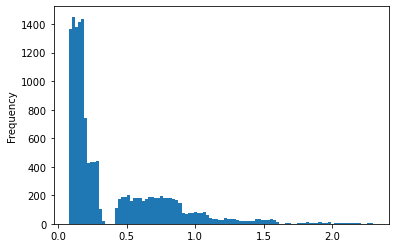

In [4]:
regreped['DiabetesPedigree'].plot.hist(bins=100)

In [5]:
'''
scaler =MinMaxScaler()
col = regreped.columns
regreped = scaler.fit_transform(regreped)
regreped = pd.DataFrame(regreped,columns=[col])
regreped.head()
'''

'\nscaler =MinMaxScaler()\ncol = regreped.columns\nregreped = scaler.fit_transform(regreped)\nregreped = pd.DataFrame(regreped,columns=[col])\nregreped.head()\n'

In [6]:
columns = [c for c in regreped.columns if c not in ['DiabetesPedigree','PatientID']]
X = regreped[columns]
y = regreped['DiabetesPedigree']

In [7]:
X=X.head(2000)
y=y.head(2000)

In [8]:
X.head()

,Pregnancies,SerumInsulin,BMI,Age,Diabetic
0,0,23,43.509726,21,0
1,8,36,21.240576,23,0
2,7,35,41.511523,23,0
3,9,304,29.582192,43,1
4,1,35,42.604536,22,0


In [9]:
y.shape

(2000,)

In [10]:
X=X.astype('float')
y=y.astype('float')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [12]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1600, 5)

(400, 5)

(1600,)

(400,)

In [13]:
forest = RandomForestRegressor(n_estimators=100,max_depth=30,random_state=2)
forest

RandomForestRegressor(max_depth=30, random_state=2)

In [14]:
#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(y)

In [15]:
#training_scores_encoded

In [16]:
X_train.head()

,Pregnancies,SerumInsulin,BMI,Age,Diabetic
968,0.0,44.0,41.891061,22.0,0.0
240,0.0,149.0,19.576651,25.0,0.0
819,1.0,133.0,38.274525,33.0,0.0
692,9.0,18.0,31.066723,29.0,1.0
420,2.0,70.0,21.343986,56.0,1.0


In [17]:
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, random_state=2)

In [18]:
forest.score(X,y)

0.6273794393894627

In [19]:
#n_estimators=100,max_depth=30,random_state=2
n_estimators=[10,50,100,150,200]
max_depth=[10,20,30,50]
random_state=[2,3,5]
param_grid = dict(n_estimators=n_estimators,max_depth=max_depth,random_state=random_state)
param_grid 

{'n_estimators': [10, 50, 100, 150, 200],
 'max_depth': [10, 20, 30, 50],
 'random_state': [2, 3, 5]}

In [20]:
%%time

grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1)
grid_result = grid.fit(X,y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.024685 using {'max_depth': 10, 'n_estimators': 200, 'random_state': 2}
Wall time: 1min 10s


In [21]:
forest = RandomForestRegressor(n_estimators=200,max_depth=10,random_state=2)
fitting = forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
forest.score(X,y)

0.47029734037980664

In [22]:
regre2=regreped[['PatientID','DiabetesPedigree']]
regre2.head()

,PatientID,DiabetesPedigree
0,1354778,1.213191
1,1147438,0.158365
2,1640031,0.079019
3,1883350,1.282870
4,1424119,0.549542
